# Étude du pourcentage de réadmission des patients aux urgences
Notre but est de prédir en fonction des traitements reçu par un patient diabétique s'il va ou non être ré-admis dans les 30 jours. 
Pour cela, nous nous basons sur un jeu de données des hopitaux américains entre 1999 et 2008

In [119]:
import pandas as pd 
import seaborn as sns

data = pd.read_csv('diabetic_data.csv'); 
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Nous commencons par enlever les colonnes dont nous n'avons pas besoins où qui sont abérantes. Le colonne weight ne semble pas correctement renseigné nous ne l'utilisons pas.

In [120]:
data = data.drop(['weight','payer_code','change'], axis=1)

Nous allons rapidement étudié notre jeu de données afin de comprendre sur quel échantillion nous travaillons

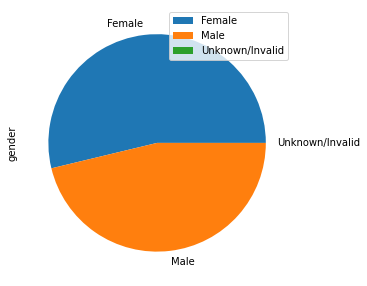

In [121]:
gvalues = []
glabels = []
for g, row in data.groupby('gender'):
    gvalues.append(row.gender.count())
    glabels.append(g)
df = pd.DataFrame({'gender': gvalues},index=glabels)

plot = df.plot.pie(y='gender', figsize=(5, 5))

On constate donc que notre échantillion est répartie de façon équitable homme / femme. Nous allons enlever les individus de type unkown pour ne pas fausser la suite.

In [122]:
data = data[(data.gender == 'Male') | (data.gender == 'Female')]

In [123]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,No,Up,No,No,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,No,Up,No,No,No,No,No,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,No,Steady,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,?,...,No,No,Down,No,No,No,No,No,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,?,...,No,No,Steady,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,?,...,No,No,Down,No,No,No,No,No,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,No,Up,No,No,No,No,No,Yes,NO


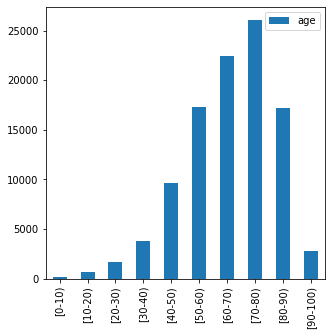

In [124]:
avalues = []
alabels = []
for a, row in data.groupby('age'):
    avalues.append(row.age.count())
    alabels.append(a)
df = pd.DataFrame({'age': avalues},index=alabels)

plot = df.plot.bar(y='age', figsize=(5, 5))

On peut voir ci-dessus que la plus grande partie des cas étudiés sont des personnes agées de 50 à 90

Nous allons maintenant encoder les données textuelles afin de pour travailler plus simplement avec

In [129]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.race = label_encoder.fit_transform(data.race)
data.gender = label_encoder.fit_transform(data.gender)
data.age = label_encoder.fit_transform(data.age)
data.medical_specialty = label_encoder.fit_transform(data.medical_specialty)
data.max_glu_serum = label_encoder.fit_transform(data.max_glu_serum)
data.A1Cresult = label_encoder.fit_transform(data.A1Cresult)
data.metformin = label_encoder.fit_transform(data.metformin)
data.repaglinide = label_encoder.fit_transform(data.repaglinide)
data.nateglinide = label_encoder.fit_transform(data.nateglinide)
data.chlorpropamide = label_encoder.fit_transform(data.chlorpropamide)
data.glimepiride = label_encoder.fit_transform(data.glimepiride)
data.acetohexamide = label_encoder.fit_transform(data.acetohexamide)
data.glipizide = label_encoder.fit_transform(data.glipizide)
data.glyburide = label_encoder.fit_transform(data.glyburide)
data.tolbutamide = label_encoder.fit_transform(data.tolbutamide)
data.pioglitazone = label_encoder.fit_transform(data.pioglitazone)
data.rosiglitazone = label_encoder.fit_transform(data.rosiglitazone)
data.acarbose = label_encoder.fit_transform(data.acarbose)
data.miglitol = label_encoder.fit_transform(data.miglitol)
data.troglitazone = label_encoder.fit_transform(data.troglitazone)
data.tolazamide = label_encoder.fit_transform(data.tolazamide)
data.examide = label_encoder.fit_transform(data.examide)
data.insulin = label_encoder.fit_transform(data.insulin)
data.citoglipton = label_encoder.fit_transform(data.citoglipton)
data['glyburide-metformin'] = label_encoder.fit_transform(data['glyburide-metformin'])
data['glipizide-metformin'] = label_encoder.fit_transform(data['glipizide-metformin'])
data['glimepiride-pioglitazone'] = label_encoder.fit_transform(data['glimepiride-pioglitazone'])
data['metformin-rosiglitazone'] = label_encoder.fit_transform(data['metformin-rosiglitazone'])
data['metformin-pioglitazone'] = label_encoder.fit_transform(data['metformin-pioglitazone'])
data.diabetesMed = label_encoder.fit_transform(data.diabetesMed)
data.readmitted = label_encoder.fit_transform(data.readmitted)
data.diag_1 = label_encoder.fit_transform(data.diag_1)
data.diag_2 = label_encoder.fit_transform(data.diag_2)
data.diag_3 = label_encoder.fit_transform(data.diag_3)

data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,3,0,0,6,25,1,1,38,...,0,0,1,1,0,0,0,0,0,2
1,149190,55629189,3,0,1,1,1,7,3,0,...,0,0,3,1,0,0,0,0,1,1
2,64410,86047875,1,0,2,1,1,7,2,0,...,0,0,1,1,0,0,0,0,1,2
3,500364,82442376,3,1,3,1,1,7,2,0,...,0,0,3,1,0,0,0,0,1,2
4,16680,42519267,3,1,4,1,1,7,1,0,...,0,0,2,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,1,7,1,3,7,3,0,...,0,0,0,1,0,0,0,0,1,1
101762,443847782,74694222,1,0,8,1,4,5,5,0,...,0,0,2,1,0,0,0,0,1,2
101763,443854148,41088789,3,1,7,1,1,7,1,0,...,0,0,0,1,0,0,0,0,1,2
101764,443857166,31693671,3,0,8,2,3,7,10,63,...,0,0,3,1,0,0,0,0,1,2


<AxesSubplot:>

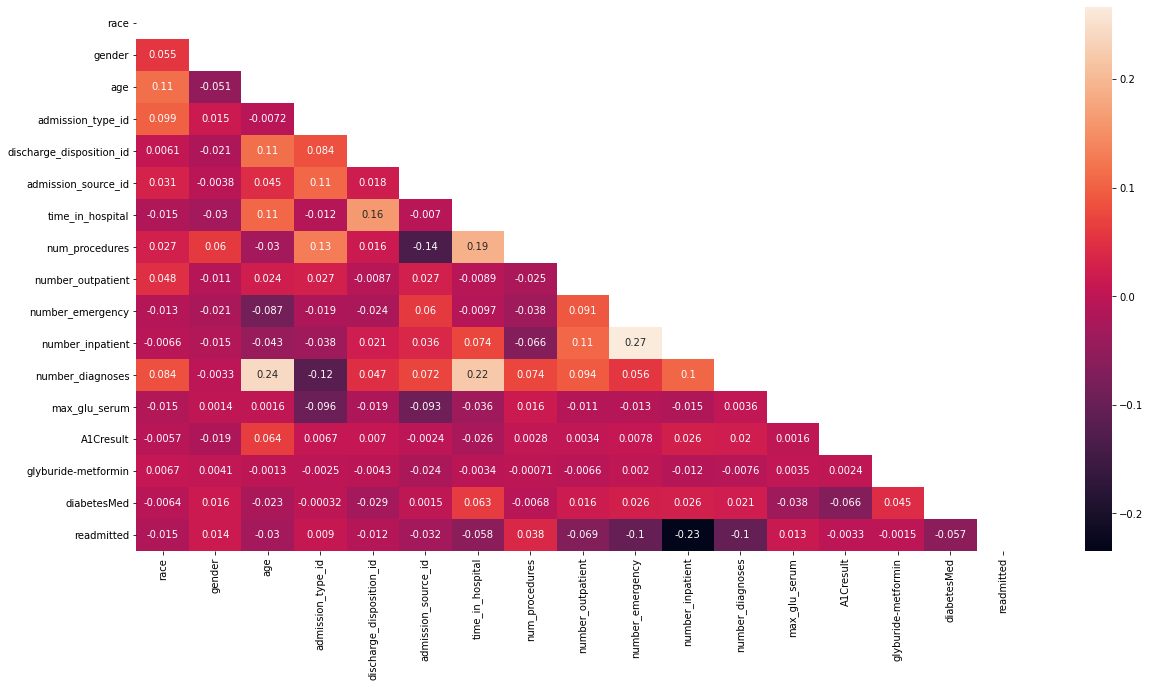

In [136]:
import numpy as np
import matplotlib.pyplot as plt

d1 = data.drop([
    'encounter_id', 'patient_nbr',
    'diag_1', 'diag_2', 'diag_3', 'num_lab_procedures', 'medical_specialty','num_medications',
    'metformin', 'repaglinide','nateglinide','chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide','glyburide', 
    'tolbutamide', "pioglitazone", 'rosiglitazone', "acarbose", "miglitol",
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glipizide-metformin','glimepiride-pioglitazone',
    'metformin-rosiglitazone','metformin-pioglitazone'], axis=1);

corr = d1.corr()
    
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax =ax, mask=mask)

La heatmap si dessus, réalisée avec une partie du dataset nous permet de voir les champs avec une forte corrélation. Le fait d'enlever certains champs permet d'avoir une meilleure visibilité de l'échelle. On peut conclure grâce au schéma ci-dessus plusieurs choses. Premièrement que le nombre de diagnostiques est fortement lié à l'âge et au temps passé à l'hopital, mais également que le taux de réadmission est fortement lié au nombre de visites passées.

Nous allons maintenant mettre en place un algorithme de Random Forest afin d'essayer de prédir le résultat concernant la ré-admission. Il nous faut déjà définir quelles sont les colonnes qui vont nous servir pour faire la prédiction ainsi que la colonne que l'on veut prédir.

In [170]:
columns = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id',
           'time_in_hospital','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult',
           'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
           'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton',
           'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','diabetesMed']

X = data[columns];
y = data['readmitted']

Il faut ensuite séparer le dataset en deux parties afin de définir quelle partie va servir à l'entraînement et quelle partie va servir à se tester. Nous choisissons ici de prendre 20% du dataset pour se tester. Le paramètre random_state nous permet de faire varier le degré de mélange des données, afin qu'elles n'arrivent pas toujours dans le même ordre dans notre alogorithme ce qui pourrait fausser ses résultats.

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((81410, 44), (20353, 44), (81410,), (20353,))

Une fois notre dataset séparé, il faut maintenant entrainer notre algorithme. Pour cela nous faisons varirer un paramètre important le n_estimators qui permet de modifier le nombre d'arbres de décision. Notre but est de trouver le bon équilibre en l'underfiting et l'outfiting.

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

hight = 0
dep = 0
for i in range(1,50):    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy').mean()
    if scores > hight :
        hight = scores
        dep = i
print(dep, scores)
    

48 0.576366539737133


On constate donc que la configuration optimale dans la limite de 50 arbres (ici pour une raison de temps de chargement) est de 48 arbres. On bien au taux de réussite de 57% ce qui est bien que plus haut que le hasard (33% dans notre choix ternaire).
On peut désormais étudier les variables les plus importantes selon notre algorithme dans la prise de décision.

<AxesSubplot:>

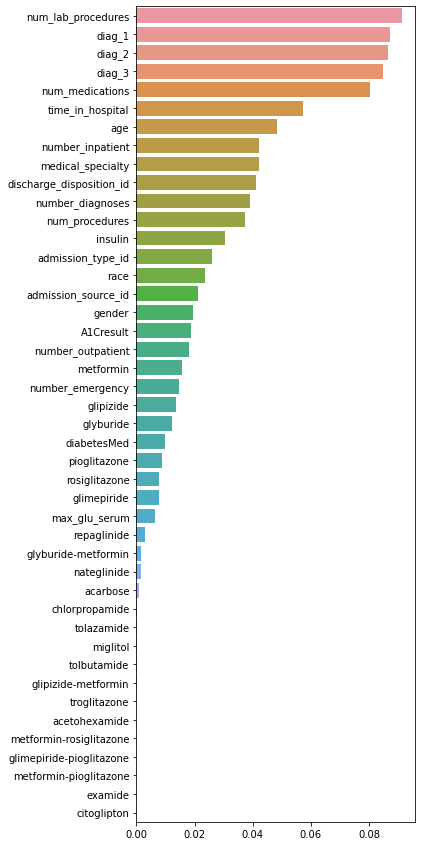

In [177]:
feature_imp = pd.Series(clf.feature_importances_, index=columns).sort_values(ascending=False)
fig_dims = (5, 15)
fig, ax = plt.subplots(figsize=fig_dims)    
sns.barplot(y=feature_imp.keys(), x=feature_imp.values, ax=ax)

On constate donc que les variables les plus importantes sont le nombre de tests en laboratoires, les diagnostics médicaux et le temps passé. On constate également que la présecription de tel ou tel médicament ne semble pas des plus importante pour notre prédiction. On peut essayer de refaire notre prédiction en ne prenant que les variables les plus importantes afin d'espérer un résultat plus précis.

In [181]:
columns = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id',
           'time_in_hospital','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','diabetesMed']

X = data[columns];
y = data['readmitted']


X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

clf = RandomForestClassifier(n_estimators=48)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy').mean()

scores


0.57511362240511

<AxesSubplot:>

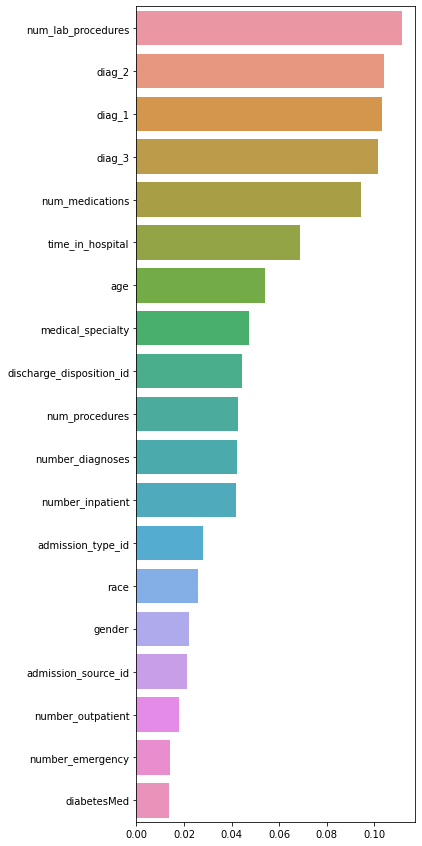

In [179]:
feature_imp = pd.Series(clf.feature_importances_, index=columns).sort_values(ascending=False)
fig_dims = (5, 15)
fig, ax = plt.subplots(figsize=fig_dims)    
sns.barplot(y=feature_imp.keys(), x=feature_imp.values, ax=ax)

On constate alors que le résultat est même légèrement moins précis. Il est donc dans plus éfficace de garder toutes les variables. 

On peut conclure que pour prédir si un patient va où non revenir à l'hôpital il est important de prendre tous nos paramètres en compte, mais qu'il y en a une dizaine qui permettent véritablement de prendre une décision. Les autres servent d'après ce que l'on peut voir à ajuster le résultat.